In [1]:
from collections import Counter
import re
import sys
sys.path.append('utils/')

sample = False

if sample:
    filename = "inputs/day03_sample.txt"
else:
    filename = "inputs/day03.txt"

with open(filename) as f:
    puzzle_input = [l.strip() for l in f.readlines()]
    
    # puzzle_input = ''
    # for line in f:
    #     puzzle_input += line


#puzzle_input_big = puzzle_input * 100

In [32]:
## TODO:
#day 3: combine pt1+2?

#day 2: check each int with new method: scan through in parallel, starting at 1, 1+n, 1+n2 etc and scanning right until no match

#day 4: stop checking where >=4 neighbours? make neighbours iterable
#day 4: don't check ones we've checked before - keep list of remaining tiles?

# day5: order the ranges *before* merging? how does this work - cleverer way of merging?
# day5: binary search on freshness for pt1?



## Day 7

In [485]:
sample = True

if sample:
    filename = "inputs/day07_sample.txt"
else:
    filename = "inputs/day07.txt"

with open(filename) as f:
    puzzle_input = [l.strip() for l in f.readlines()]
    

In [486]:
puzzle_input

['.......S.......',
 '...............',
 '.......^.......',
 '...............',
 '......^.^......',
 '...............',
 '.....^.^.^.....',
 '...............',
 '....^.^...^....',
 '...............',
 '...^.^...^.^...',
 '...............',
 '..^...^.....^..',
 '...............',
 '.^.^.^.^.^...^.',
 '...............']

In [487]:
def solve_pt1(puzzle_input):
    ans = 0
    current_rays = [c == 'S' for c in puzzle_input[0]]
    for l in puzzle_input[2:][::2]:
        splitters = [c == '^' for c in l]
        activated_splitters = [r & s for r, s in zip(current_rays, splitters)]
        ans += sum(activated_splitters)
        # any ray hitting a splitter does not continue
        current_rays = [r != s for r, s in zip(current_rays, activated_splitters)]
        # add the two new rays either side of each 'hit' splitter
        for i, s in enumerate(activated_splitters):
            if s:
                current_rays[i-1] = True
                current_rays[i+1] = True

    return ans
        

In [488]:
solve_pt1(puzzle_input)

21

In [484]:
2**1628

11935289041890653422458560211344367566035064229836658432562760370881500666512962196005301087896114215912896307042303231644136800468391898597288380229865050619886197046118267213623392373337061884683299874287304268610214384204772333275145693206369184966882385289582680400610353273504118108261671577527388040961204580193392729480145710139771575499211887880475534583729574257671153630431383455991912285960981537776990485888804447222095975742958525624801339500650274818692551404787439203784851456

In [473]:
[r & s for r, s in zip(current_rays, splitters)]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [471]:
current_rays

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [472]:
splitters

[False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False]

In [454]:
[True for c in puzzle_input[0] if c == 'S']

SyntaxError: invalid syntax (727044760.py, line 1)

In [460]:
[x == 'S' for x in puzzle_input[0]]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [453]:
puzzle_input

['.......S.......',
 '...............',
 '.......^.......',
 '...............',
 '......^.^......',
 '...............',
 '.....^.^.^.....',
 '...............',
 '....^.^...^....',
 '...............',
 '...^.^...^.^...',
 '...............',
 '..^...^.....^..',
 '...............',
 '.^.^.^.^.^...^.',
 '...............']

## Day 6


In [444]:
sample = False

if sample:
    filename = "inputs/day06_sample.txt"
else:
    filename = "inputs/day06.txt"



In [445]:
def read_input(filename):
    with open(filename, 'r') as f:
        lines = [l.replace('\n', '') for l in f.readlines()]
    return lines

puzzle_input = read_input(filename)

In [446]:
def parse_pt1(puzzle_input):
    lines = [[c for c in line.split(' ') if c != ''] for line in puzzle_input]
    return lines

processed_pt1 = parse_pt1(puzzle_input)

In [447]:
def solve_pt1(processed_pt1):
    ans = 0
    for c in range(len(processed_pt1[0])):
        operation = processed_pt1[-1][c]
        arr = [int(l[c]) for l in processed_pt1[:-1]]
        
        if operation == '+':
            ans += sum(arr)
        else:
            product = arr[0]
            for a in arr[1:]:
                product *= a
            ans += product
    return ans

solve_pt1(processed_pt1)

5877594983578

In [448]:
def parse_pt2(puzzle_input):
    add_idx = []
    mult_idx = []
    for i, c in enumerate(puzzle_input[-1]):
        if c == '+':
            add_idx.append(i)
        elif c == '*':
            mult_idx.append(i)
    column_idx = sorted(add_idx + mult_idx + [len(puzzle_input[-1]) + 1])
    add_idx = [[idx, column_idx[column_idx.index(idx)+1]-1] for idx in add_idx]
    mult_idx = [[idx, column_idx[column_idx.index(idx)+1]-1] for idx in mult_idx]

    ans = 0
    for idx_range in add_idx:
        nums = get_vertical_nums(puzzle_input, idx_range)
        ans += sum(nums)
    for idx_range in mult_idx:
        nums = get_vertical_nums(puzzle_input, idx_range)
        this_product = nums[0]
        for n in nums[1:]:
            this_product *= n
        ans += this_product

    return ans

ans = parse_pt2(puzzle_input)
ans

11159825706149

In [441]:
def get_vertical_nums(puzzle_input, idx_range):
    nums = []
    for i in range(idx_range[0], idx_range[1]):
        this_num = int(''.join([l[i] for l in puzzle_input[:-1] if l[i] != ' ']))
        nums.append(this_num)
    return nums

## Day 5

In [279]:
sample = True

if sample:
    filename = "inputs/day05_sample.txt"
else:
    filename = "inputs/day05.txt"

def parse_input(filename):
    ranges = []
    ingredients = []
    with open(filename, 'r') as f:
        lines = [line.strip() for line in f]

    i = lines.index('')
    ranges = [[int(_) for _ in l.split('-')] for l in lines[:i]]
    ingredients = [int(l) for l in lines[i+1:]]
            
    return ranges, ingredients

ranges, ingredients = parse_input(filename)

In [176]:
def merge_ranges(r1, r2):
    output = False
    
    # r1 inside r2
    if (r1[0] >= r2[0]) and (r1[1] <= r2[1]):
        output = r2
        
    # r2 inside r1
    elif (r1[0] <= r2[0]) and (r1[1] >= r2[1]):
        output = r1
        
    # r1 is left overlap
    elif (r1[0] <= r2[0]) and (r1[1] >= r2[0]):
        output = [r1[0], r2[1]]

    # r2 is right overlap
    elif (r1[1] >= r2[1]) and (r1[0] <= r2[1]):
        output = [r2[0], r1[1]]

    return output

In [182]:
def merge_all(ranges):
    for i in range(0, len(ranges) - 1):
        for j in range(i+1, len(ranges)):
            merged_range = merge_ranges(ranges[i], ranges[j])
            if merged_range:
                return (False, ranges[:i] + ranges[i+1:j] + ranges[j+1:] + [merged_range])
    return (True, ranges)

In [197]:
def solve_pt2(ranges):
    finished = False
    while not finished:
        finished, ranges = merge_all(ranges)
    
    ans = 0
    for r in ranges:
        ans += (1 + r[1] - r[0])
    return ans, ranges

In [232]:
def solve_pt1(ranges, ingredients):
    ans = 0
    #ingredients = sorted(ingredients)
    ranges = sorted(ranges)
    for i in ingredients:
        for r in ranges:
            #if i in range(r[0], r[1]+1):
            if (i >= r[0]) & (i <= r[1]):
                ans += 1
                break
            if i < r[0]:
                break
    return ans

In [271]:
def is_fresh(ingredient, ranges_sorted):
    for r in ranges_sorted:
        if (ingredient >= r[0]) & (ingredient <= r[1]):
            return 1
        if ingredient < r[0]:
            return 0
    return 0

In [268]:
%%timeit
sum(list(map(lambda x: is_fresh(x, ranges), ingredients)))

246 μs ± 984 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [272]:
%%timeit
ranges_sorted = sorted(ranges)
sum(list(map(lambda x: is_fresh(x, ranges_sorted), ingredients)))

1.37 ms ± 4.32 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [267]:
ranges, ingredients = parse_input(filename)
ans2, ranges = solve_pt2(ranges)
ans1 = solve_pt1(ranges, ingredients)

In [226]:
%%timeit
ranges, ingredients = parse_input(filename)

147 μs ± 507 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [227]:
%%timeit
ans2, new_ranges = solve_pt2(ranges)

374 μs ± 1.29 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [234]:
%%timeit
ans1 = solve_pt1(ranges, ingredients)

1.32 ms ± 4.47 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [230]:
solve_pt1(ranges, ingredients)

679

## Day 1

In [73]:
sample = False

if sample:
    filename = "inputs/day01_sample.txt"
else:
    filename = "inputs/day01.txt"

def parse_input(filename):
    with open(filename, 'r') as f:
        puzzle_input = [l.strip() for l in f.readlines()]
    return puzzle_input

puzzle_input = parse_input(filename)

In [59]:
def solve_pt1(puzzle_input):
    pos = 50
    ans = 0
    for l in puzzle_input:
        if l[0] == 'L':
            x = -1 * int(l[1:])
        else:
            x = int(l[1:])
        pos += x
        pos = pos % 100
        if pos == 0:
            ans += 1
        #print(pos, ans)
    return ans

In [109]:
def solve_pt2(puzzle_input):
    pos = 50
    ans = 0
    for l in puzzle_input:
        x = int(l[1:])
        #print('\n', l[0], x)

        div, x = divmod(x, 100)
        if div > 0:
            #print(div)
            ans += div
        if l[0] == 'L':
            x = -x

        new_pos = pos + x
        newer_pos = new_pos % 100
        if ((newer_pos != new_pos) & (pos > 0)):
            ans += 1
        elif newer_pos == 0:
            ans += 1
        pos = newer_pos

    return ans




In [114]:
def solve(puzzle_input):
    pos = 50
    ans1 = 0
    ans2 = 0
    for l in puzzle_input:
        x = int(l[1:])
        #print('\n', l[0], x)

        div, x = divmod(x, 100)
        if div > 0:
            #print(div)
            ans2 += div
        if l[0] == 'L':
            x = -x

        new_pos = pos + x
        newer_pos = new_pos % 100
        if ((newer_pos != new_pos) & (pos > 0)):
            ans2 += 1
        elif newer_pos == 0:
            ans2 += 1
        if newer_pos == 0:
            ans1 += 1
        pos = newer_pos

    return ans1, ans2

<BarContainer object of 3 artists>

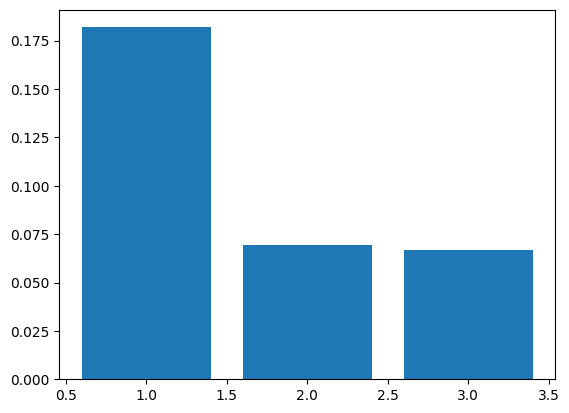

In [133]:
times = [0.1819,
0.0694,
0.0667]

import matplotlib.pyplot as plt
plt.bar(height = times, x = [1,2,3])

In [131]:

ans_1 = solve_pt1(puzzle_input)
ans_2_orig = solve_pt2_orig(puzzle_input)
ans_2 = solve_pt2(puzzle_input)

print(ans_1)
print(ans_2_orig)
print(ans_2)

1147
6789
6789


In [115]:
solve(puzzle_input)

(1147, 6789)

In [129]:
%%timeit
ans_1 = solve_pt1(puzzle_input)
ans_2 = solve_pt2(puzzle_input)

1.13 ms ± 10.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [130]:
%%timeit
ans1, ans2 = solve(puzzle_input)

693 μs ± 6.08 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Day 4


In [10]:
sample = False

if sample:
    filename = "inputs/day04_sample.txt"
else:
    filename = "inputs/day04.txt"

def parse_input(filename):
    with open(filename) as f:
        puzzle_input = [l.strip() for l in f.readlines()]
    return puzzle_input



In [33]:
from utils.grid import Grid
import importlib
importlib.reload(grid)

<module 'utils.grid' from '/home/majikthise/AoC_2025/utils/grid.py'>

In [42]:
def parse_input(filename):
    with open(filename) as f:
        puzzle_input = [[c == '@' for c in l.strip()] for l in f.readlines()]
    return puzzle_input

In [43]:
def solve(grid):
    rolls = grid.find_removable_rolls()
    ans1 = len(rolls)

    grid.remove_rolls(rolls)

    ans2 = ans1
    while True:
        new_removals = grid.find_and_remove_rolls()
        ans2 += new_removals
        if new_removals == 0:
            break

    return ans1, ans2

In [40]:
%%timeit
puzzle_input = parse_input(filename)
grid = Grid(puzzle_input)
solve(grid)

1.81 ms ± 14 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [45]:
%%timeit
puzzle_input = parse_input(filename)

249 μs ± 1.51 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
%%timeit
grid = Grid(puzzle_input)

80.6 ns ± 0.22 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [47]:
%%timeit

solve(grid)

1.48 ms ± 3.14 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [38]:
grid = Grid(puzzle_input)
print(grid.y_max)
print(grid.x_max)

137
137


In [13]:
%%timeit
puzzle_input = parse_input(filename)
solve(puzzle_input)

160 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Day 2

In [2]:
sample = False

if sample:
    filename = "inputs/day02_sample.txt"
else:
    filename = "inputs/day02.txt"

def parse_input(filename):
    with open(filename, 'r') as f:
        puzzle_input = [l.strip().split('-') for l in f.read().split(',')]
    return puzzle_input

def solve(puzzle_input):
    ans1 = []
    ans2 = []

    for pairs in puzzle_input:
        for i in range(int(pairs[0]), int(pairs[1])+1):
            x = str(i)
            lenx = len(x)
            
            # Part 1
            if lenx % 2 == 0:
                splitpoint = int(lenx / 2)
                leftx = x[:splitpoint]
                rightx = x[splitpoint:]
                if leftx == rightx:
                    ans1.append(i)

            # Part 2
            if re.match(r'^(\d+)\1+$', x):
                #print(i)
                ans2.append(i)

    return sum(ans1), sum(ans2)

In [3]:
puzzle_input = parse_input(filename)
puzzle_input

[['197', '407'],
 ['262128', '339499'],
 ['557930', '573266'],
 ['25', '57'],
 ['92856246', '93001520'],
 ['2', '12'],
 ['1919108745', '1919268183'],
 ['48414903', '48538379'],
 ['38342224', '38444598'],
 ['483824', '534754'],
 ['1056', '1771'],
 ['4603696', '4688732'],
 ['75712519', '75792205'],
 ['20124', '44038'],
 ['714164', '782292'],
 ['4429019', '4570680'],
 ['9648251', '9913729'],
 ['6812551522', '6812585188'],
 ['58', '134'],
 ['881574', '897488'],
 ['648613', '673853'],
 ['5261723647', '5261785283'],
 ['60035', '128980'],
 ['9944818', '10047126'],
 ['857821365', '857927915'],
 ['206885', '246173'],
 ['1922', '9652'],
 ['424942', '446151'],
 ['408', '1000']]

In [6]:
def solve_pt1(puzzle_input):
    ans1 = []

    for pairs in puzzle_input:
        for i in range(int(pairs[0]), int(pairs[1])+1):
            x = str(i)
            lenx = len(x)
            
            # Part 1
            if lenx % 2 == 0:
                splitpoint = int(lenx / 2)
                leftx = x[:splitpoint]
                rightx = x[splitpoint:]
                if leftx == rightx:
                    ans1.append(i)

    return sum(ans1)

In [22]:
def find_highest_n_digits(puzzle_input):
    flat_input = [int(x) for xs in puzzle_input for x in xs]
    return len(str(max(flat_input)))

def gen_atoms(n_digits):
    return range(10**(n_digits-1), 10**n_digits)

def generate_candidates(n_digits, all_n = True):
    candidates = []
    for i in range(1, int(n_digits*0.5)+1):
        if n_digits % i == 0:
            num_repeats = int(n_digits / i)
            if all_n or num_repeats == 2:
                for candidate in gen_atoms(i):
                    candidates.append(str(candidate)*num_repeats)
    return candidates

def generate_all_candidates(highest_n_digits, all_n = True):
    all_candidates = []
    for i in range(1, highest_n_digits + 1):
        #print(i)
        all_candidates += generate_candidates(i, all_n)
    return set(int(_) for _ in all_candidates)



def solve_pt2(puzzle_input):
    highest_n_digits = find_highest_n_digits(puzzle_input)
    all_candidates = generate_all_candidates(highest_n_digits, all_n = True)
    ans = 0
    for l in puzzle_input:
        this_range = range(int(l[0]), int(l[1]) + 1)
        #matches = [k for k in all_candidates if k in this_range]
        matches = [k for k in this_range if k in all_candidates]
        #matches = [k for k in all_candidates if k >= int(l[0]) and k <= int(l[1])]
        ans += sum(matches)
    return ans



In [29]:
def solve(puzzle_input):
    highest_n_digits = find_highest_n_digits(puzzle_input)
    pt1_candidates = generate_all_candidates(highest_n_digits, all_n = False)
    pt2_candidates = generate_all_candidates(highest_n_digits, all_n = True)
    print(len(pt2_candidates))
    ans1 = 0
    ans2 = 0
    for l in puzzle_input:
        this_range = range(int(l[0]), int(l[1]) + 1)
        #matches = [k for k in all_candidates if k in this_range]
        for i in this_range:
            if i in pt1_candidates:
                ans1 += i
                ans2 += i
            elif i in pt2_candidates:
                ans2 += i
    return ans1, ans2

In [31]:
puzzle_input = parse_input(filename)
ans_1, ans_2 = solve(puzzle_input)

101088


In [24]:
%%timeit
puzzle_input = parse_input(filename)
ans_1 = solve_pt1(puzzle_input)
ans_2 = solve_pt2(puzzle_input)

201 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit
puzzle_input = parse_input(filename)
# ans_1 = solve_pt1(puzzle_input)
# ans_2 = solve_pt2(puzzle_input)

6.52 μs ± 75.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [26]:
%%timeit
# puzzle_input = parse_input(filename)
ans_1 = solve_pt1(puzzle_input)
# ans_2 = solve_pt2(puzzle_input)

157 ms ± 561 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%timeit
# puzzle_input = parse_input(filename)
# ans_1 = solve_pt1(puzzle_input)
ans_2 = solve_pt2(puzzle_input)

40.2 ms ± 156 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%%timeit
puzzle_input = parse_input(filename)
ans_1, ans_2 = solve(puzzle_input)

70.7 ms ± 300 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Day 3

In [ ]:
if sample:
    filename = "inputs/day03_sample.txt"
else:
    filename = "inputs/day03.txt"

with open(filename) as f:
    puzzle_input = [l.strip() for l in f.readlines()]

In [158]:
puzzle_input[:5]

['2221222621311222213132242151213242132162234231144212112222231222222222122221122241223232322424322112',
 '3543326422247421243461523246251225253652324623123514155262436222322736212622632535261512337153224225',
 '3222222314222211221232222212222122123212133222228331212211323332221223322223222121221222222212212121',
 '3224323622236944523235623633582354553243243425462556164564534655532214442234136726342452535235224521',
 '4463242484324251544436315213253238423242742225441254332255425532344624856246285453554421653275554443']

In [173]:
def solve_pt1(puzzle_input):
    ans = 0
    for l in puzzle_input:
        first_digit = l[0]
        first_digit_pos = 0
        
        # find the first digit
        for i, digit in enumerate(l[1:-1]):
            if digit > first_digit:
                first_digit = digit
                first_digit_pos = i+1
                
        # find the second digit
        second_digit = l[first_digit_pos + 1]
        if first_digit_pos + 1 < len(l):
            for digit in l[first_digit_pos + 1:]:
                if digit > second_digit:
                    second_digit = digit
        line_sol = int(first_digit + second_digit)
        ans += line_sol
        
    return ans

In [186]:
def find_peak(l, start_pos, digits_to_spare):
    
    best_digit = l[start_pos]
    best_pos = start_pos
    for i, digit in enumerate(l[start_pos+1:len(l)-digits_to_spare]):
        #print( i, digit)
        if digit > best_digit:
            best_digit = digit
            best_pos = start_pos + 1 + i
            if digit == '9':
                break
    #print(f'finding best dig in {l[start_pos:len(l)-digits_to_spare]}: {best_digit}')
    return best_digit, best_pos
        

In [187]:
def solve_pt2(puzzle_input, tot_digits = 12):
    ans = 0
    for l in puzzle_input:
        this_ans = ''
        current_pos = -1
        for i in range(0, tot_digits):
            best_digit, current_pos = find_peak(l, start_pos = current_pos + 1, digits_to_spare = tot_digits - (i + 1))
            this_ans += best_digit
    
        ans += int(this_ans)
    return ans

In [188]:
%%timeit
solve_pt2(puzzle_input, tot_digits = 12)

1.15 ms ± 3.79 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [182]:
%%timeit
solve_pt2(puzzle_input, tot_digits = 12)

1.16 ms ± 2.28 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [175]:
%%timeit
solve_pt1(puzzle_input)

468 μs ± 1.58 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [178]:
solve_pt2(puzzle_input)

170418192256861